In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station=Base.classes.station
Measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# 1-Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# 2-Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", year_ago)

Query Date:  2016-08-23


In [12]:
#3- Perform a query to retrieve the data and precipitation scores
last_year_prcp=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date.desc()).all()
#print(last_year_prcp)
pd.DataFrame(last_year_prcp)

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2218,2016-08-24,2.28
2219,2016-08-24,NaN
2220,2016-08-24,1.22
2221,2016-08-24,2.15


In [13]:
# 4-Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(last_year_prcp, columns=['date','prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [14]:
# 5-Sort the dataframe by date
prcp_df.sort_values(by='date')

,prcp
date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


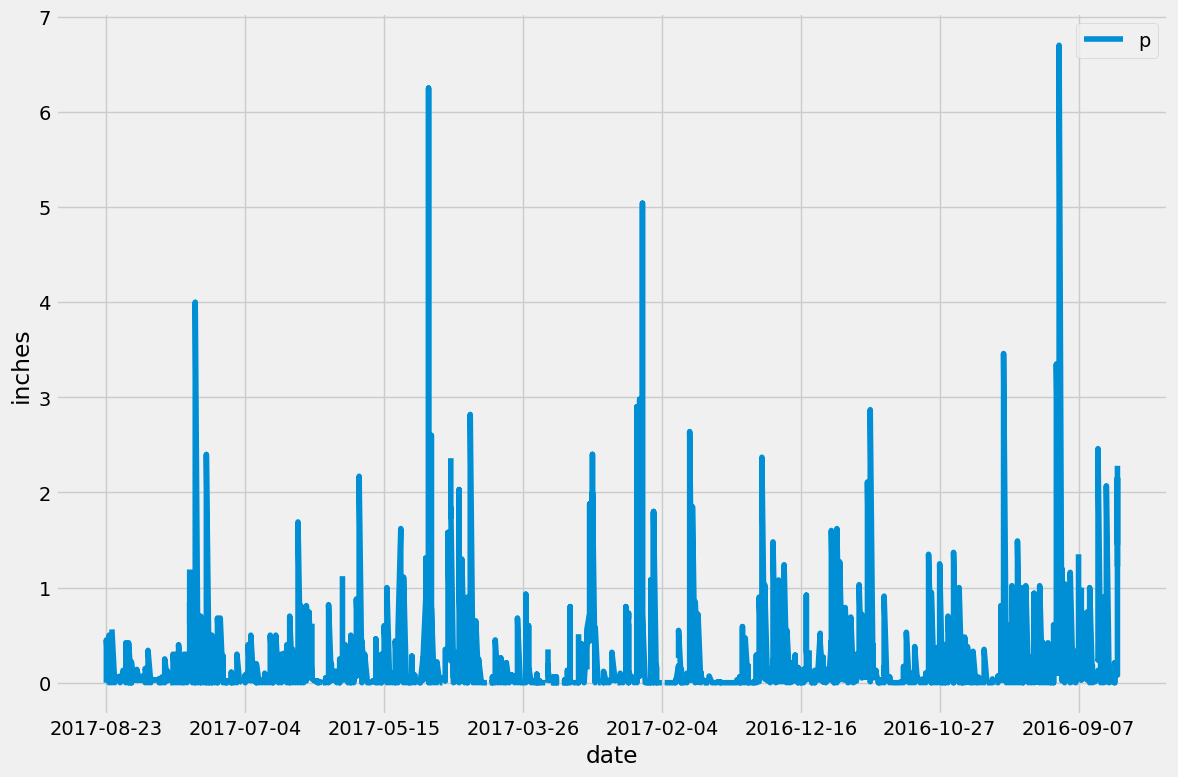

In [15]:
# 6-Use Pandas Plotting with Matplotlib to plot the data

from matplotlib.ticker import (AutoMinorLocator, 
                               MultipleLocator)

df=pd.DataFrame(last_year_prcp, columns=['date','prcp'])


fig, ax = plt.subplots(figsize = (12,8))
plt.plot(df['date'], df['prcp'])
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.xlabel("date")
plt.ylabel("inches")
plt.legend('precipitation')
plt.tight_layout()
plt.show()




In [16]:
# 7-Use Pandas to calcualte the summary statistics for the precipitation data

prcp_statistics=prcp_df[["prcp"]].aggregate(['sum','min','max','mean','median','var','std','sem'])
prcp_statistics


,prcp
sum,355.570000
min,0.000000
max,6.700000
mean,0.176462
median,0.020000
var,0.211865
std,0.460288
sem,0.010254


# Exploratory Station Analysis

In [17]:
# 1-Design a query to calculate the total number stations in the dataset
#session.query(func.count(Measurement.station)).all()
total_stations = session.query(Measurement.station).distinct().count()
print(total_stations)

9


In [18]:
# 2-Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

all_stations=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
all_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# 3-Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sts = [Measurement.station, 
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs)]

most_act_station_temp = session.query(*sts).\
    filter(Measurement.station=="USC00519281").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
most_act_station_temp

[('USC00519281', 71.66378066378067, 85.0, 54.0)]

In [20]:
#4-Using the most active station id
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp=session.query(Measurement.station,Measurement.date,Measurement.tobs).\
    filter(Measurement.date > dt.date(2016,8,23)).\
    filter(Measurement.station=="USC00519281").\
    order_by(Measurement.date.desc()).all()
last_year_temp_df=pd.DataFrame(last_year_temp)
last_year_temp_df
#print(last_year_temp)


,station,date,tobs
0,USC00519281,2017-08-18,79.0
1,USC00519281,2017-08-17,76.0
2,USC00519281,2017-08-16,76.0
3,USC00519281,2017-08-15,77.0
4,USC00519281,2017-08-14,77.0
...,...,...,...
346,USC00519281,2016-08-28,73.0
347,USC00519281,2016-08-27,75.0
348,USC00519281,2016-08-26,80.0
349,USC00519281,2016-08-25,80.0


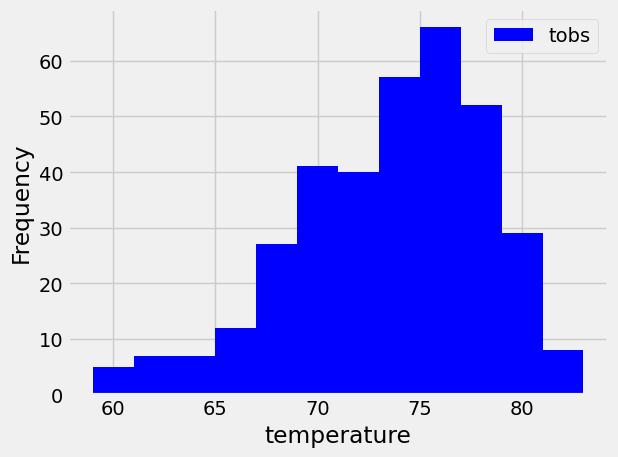

In [21]:

last_year_temp_df.plot.hist(color="b", bins=12)
plt.xlabel("temperature")
plt.tight_layout()
plt.show()


# Close session

In [36]:
# Close Session
session.close()